## `hetGPy` Basic Usage Tutorial

* This notebook gives a high-level overview of the basic of `hetGPy`
* We discuss the core model objects, regression, and prediction

More detailed examples and tutorials are given in subsequent notebooks.


## Basic Setup

* The central objects that performs Gaussian process regeression (GPR) in `hetGPy` are the `homGP` and `hetGP` objects for homoskedastic and heteroskedasic regression.

First, we show the noiseless case

### Noiseless

In [1]:
from hetgpy.homGP import homGP
import numpy as np
import matplotlib.pyplot as plt
xgrid = np.linspace(0,2*np.pi, 100).reshape(-1,1)
X = np.linspace(0,2*np.pi, 10).reshape(-1,1)
Z = np.sin(X).squeeze()

Text(0, 0.5, 'sin(X)')

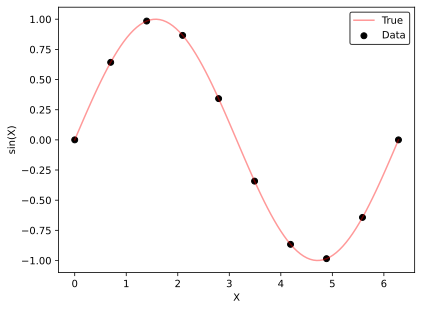

In [2]:
%config InlineBackend.figure_formats = ['svg']
fig, ax = plt.subplots()
ax.plot(xgrid.squeeze(), np.sin(xgrid.squeeze()), label = 'True', color = 'red', alpha = 0.4)
ax.scatter(X, Z, color = 'k', label = 'Data')
ax.legend(edgecolor='black')
ax.set_xlabel('X'); ax.set_ylabel('sin(X)')

* To train a GPR, instantiate the model object (`homGP` or `hetGP`) and call the maximum likelihood estimation function (`mleHomGP` or `mleHetGP`)
* After training, call `predict` on the model object to return the mean and variance predictions. 

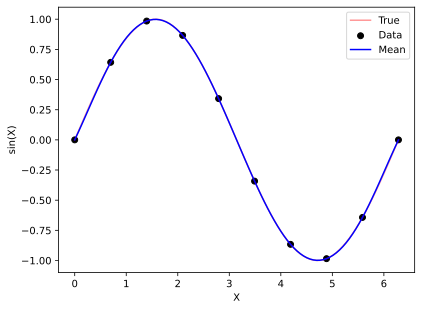

In [3]:
# now train a homoskedastic Gaussian Process Regression
GP = homGP()
GP.mleHomGP(
    X = X,
    Z = Z,
    covtype = "Gaussian",
    lower = np.array([0.1]),
    upper = np.array([2.0])
)
preds = GP.predict(x = xgrid)
xs = xgrid.squeeze()
ax.plot(xs, preds['mean'], color = 'blue', label = 'Mean')
ax.legend()
fig

### Fast Estimation under Replication

* `hetGPy` is designed to handle replication
* Consider the same example, except this time with some replication (5 each) and noise

Text(0, 0.5, 'sin(X)')

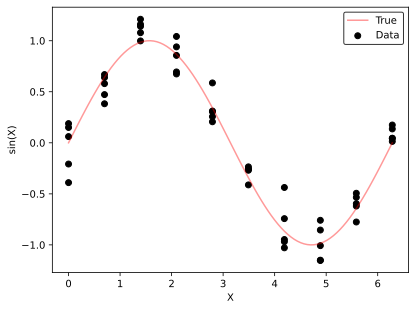

In [18]:
rand = np.random.default_rng(seed = 42)
xgrid = np.linspace(0,2*np.pi, 100).reshape(-1,1)
X = np.linspace(0,2*np.pi, 10)
X = np.repeat(X,repeats = 5).reshape(-1,1)
Z = np.sin(X).squeeze() 
Z += 0.2 * rand.normal(loc = 0,size = len(Z))

fig, ax = plt.subplots()
ax.plot(xgrid.squeeze(), np.sin(xgrid.squeeze()), label = 'True', color = 'red', alpha = 0.4)
ax.scatter(X, Z, color = 'k', label = 'Data')
ax.legend(edgecolor='black')
ax.set_xlabel('X'); ax.set_ylabel('sin(X)')

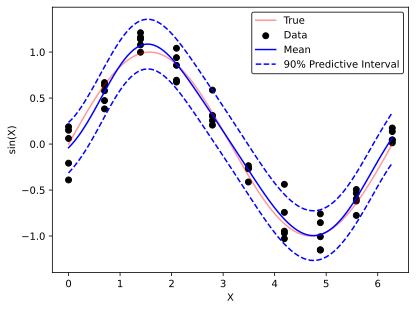

In [19]:
GP = homGP()
GP.mleHomGP(
    X = X,
    Z = Z,
    covtype = "Gaussian",
    lower = np.array([0.1]),
    upper = np.array([2.0])
)
preds = GP.predict(x = xgrid, interval = 'predictive', interval_lower = 0.05, interval_upper = 0.95)
xs = xgrid.squeeze()
interval = preds['predictive_interval']
ax.plot(xs, preds['mean'], color = 'blue', label = 'Mean')
ax.plot(xs, interval['lower'], color = 'blue', label = '90% Predictive Interval', linestyle = 'dashed')
ax.plot(xs, interval['upper'], color = 'blue',linestyle = 'dashed')
ax.legend(edgecolor='black')
fig